In [29]:
import Pkg
Pkg.activate(".")

dependencies = [
    "IJulia",
    "Revise",
    "Turing",
    "MCMCChains",
    "Bijectors",
    "ParetoSmooth",  
    "LogExpFunctions",    
    "StatsPlots",             
    "DataFrames",       
    "JLD2",            
    "CSV"
]

# Pkg.add(dependencies)
Pkg.status()

using Revise, Turing, Bijectors, ParetoSmooth, LogExpFunctions, StatsPlots, DataFrames, JLD2, CSV
using Random, LinearAlgebra

jlfiles = [
    "code/DataPreparation.jl",
    "code/StatePlot.jl",
    "code/Utils.jl",
    "code/MyModels.jl",
    "code/models/glm.jl",
    "code/models/glmhmm.jl",
    "code/models/iohmm.jl",
]
for file in jlfiles
    include(file)
end

# Check number of threads
println("Running on ", Threads.nthreads(), " threads.")
# Set random seed
const SEED = 123;

  Activating project at `c:\Users\michi\WorkSpace\gitwork\mich2000jp\IPD_IOHMM`


Status `C:\Users\michi\WorkSpace\gitwork\mich2000jp\IPD_IOHMM\Project.toml`
  [76274a88] Bijectors v0.15.14
  [336ed68f] CSV v0.10.15
  [a93c6f00] DataFrames v1.8.1
  [7073ff75] IJulia v1.33.0
  [033835bb] JLD2 v0.6.3
  [2ab3a3ac] LogExpFunctions v0.3.29
  [a68b5a21] ParetoSmooth v0.7.16
  [295af30f] Revise v3.13.0
  [f3b207a7] StatsPlots v0.15.8
⌃ [fce5fe82] Turing v0.40.5
Info Packages marked with ⌃ have new versions available and may be upgradable.
Running on 12 threads.


In [30]:
## Data Preparation ----------------------------------------------------
CSV_FIX_PATH = "data/fix.csv"
CSV_RAND_PATH = "data/rand.csv"
DATA_FIX_PATH = "data/fix.jld2"
DATA_RAND_PATH = "data/rand.jld2"

ID_EXCLUDED_FP = []
ID_EXCLUDED_SP = []

prepare_data(CSV_FIX_PATH, DATA_FIX_PATH)
prepare_data(CSV_RAND_PATH, DATA_RAND_PATH)
prepare_data_with1(CSV_FIX_PATH, "data/fix_w1.jld2")
prepare_data_with1(CSV_RAND_PATH, "data/rand_w1.jld2")

data_fp = load_data(DATA_FIX_PATH, ID_excluded=ID_EXCLUDED_FP);
data_sp = load_data(DATA_RAND_PATH, ID_excluded=ID_EXCLUDED_SP);
data_fp_w1 = load_data("data/fix_w1.jld2", ID_excluded=ID_EXCLUDED_FP);
data_sp_w1 = load_data("data/rand_w1.jld2", ID_excluded=ID_EXCLUDED_SP);

Reading CSV files...
Saving processed data to data/fix.jld2 ...
Data saved successfully.
Reading CSV files...
Saving processed data to data/rand.jld2 ...
Data saved successfully.
Reading CSV files...
Saving processed data to data/fix_w1.jld2 ...
Data saved successfully.
Reading CSV files...
Saving processed data to data/rand_w1.jld2 ...
Data saved successfully.
Data loaded successfully. Excluded IDs: Any[]
Data loaded successfully. Excluded IDs: Any[]
Data loaded successfully. Excluded IDs: Any[]
Data loaded successfully. Excluded IDs: Any[]


In [31]:
p = plot_cooperation_rate(data_fp_w1, title="Cooperation Rate over Rounds (Fixed Partner)")
savefig(p, "output/cooperation_rate_fp.png")
p = plot_cooperation_rate(data_sp_w1, title="Cooperation Rate over Rounds (Shuffled Partner)")
savefig(p, "output/cooperation_rate_sp.png")

"c:\\Users\\michi\\WorkSpace\\gitwork\\mich2000jp\\IPD_IOHMM\\output\\cooperation_rate_sp.png"

In [32]:
p = plot_context_ratio(data_fp, title="Context Ratio over Rounds (Fixed Partner)")
savefig(p, "output/context_ratio_fp.png")
p = plot_context_ratio(data_sp, title="Context Ratio over Rounds (Shuffled Partner)")
savefig(p, "output/context_ratio_sp.png")

"c:\\Users\\michi\\WorkSpace\\gitwork\\mich2000jp\\IPD_IOHMM\\output\\context_ratio_sp.png"

In [33]:
p = plot_conditional_coop(data_fp, title="Cooperation Rate by Previous Actions (Fixed Partner)")
savefig(p, "output/conditional_coop_fp.png")
p = plot_conditional_coop(data_sp, title="Cooperation Rate by Previous Actions (Shuffled Partner)")
savefig(p, "output/conditional_coop_sp.png")

"c:\\Users\\michi\\WorkSpace\\gitwork\\mich2000jp\\IPD_IOHMM\\output\\conditional_coop_sp.png"

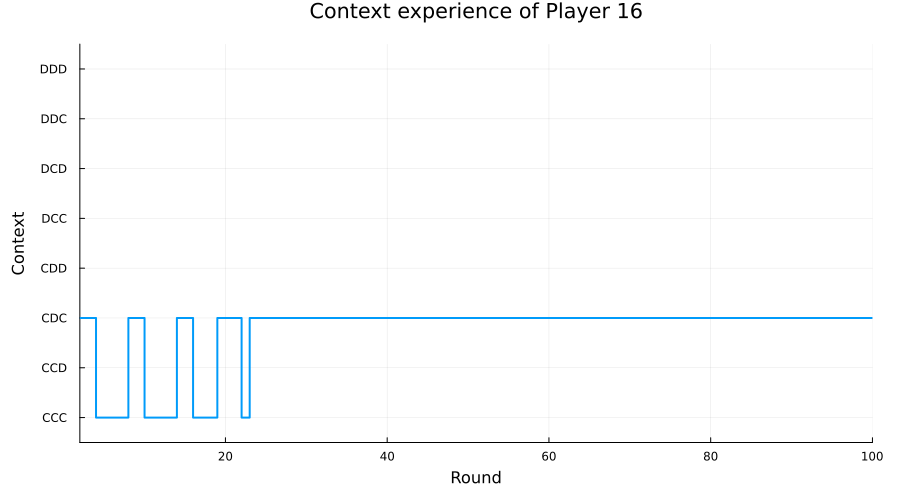

In [34]:
plot_player_context(data_fp, 16)